In [5]:
from pathlib import Path
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define autocorrelation function

In [6]:
def auto_corr(series, length):
    series = series - np.mean(series)
    correlation = np.correlate(series, series, mode="full")
    
    middle_idx = int((len(correlation)-1)/2)
    correlation = correlation[middle_idx:]
    correlation = correlation/np.dot(series,series)
    
    l = len(correlation)
    
    if l > length:
        correlation = correlation[:length]
    if l < length:
        correlation = np.concatenate([correlation, np.zeros((length-l))])
    
    return correlation

# Read trace data, compute autocorrelation

In [7]:
root_dir = Path(os.path.abspath('')).parents[1]
experiment_dir = os.path.join(root_dir, "axon_geometry")

brains = ["brain1", "brain2"]
measures = ["curvature", "torsion"]
max_id = 300
corr_length=25

d = []

for brain in brains:
    data_dir = os.path.join(experiment_dir, "data", brain)
    segments_swc_dir = os.path.join(data_dir, "segments_swc")
    trace_data_dir = os.path.join(data_dir, "trace_data", "1")
    print(f"Directory where swcs reside: {segments_swc_dir}")
    
    for i in np.arange(0, max_id):
        i = int(i)
        trace_data_path = os.path.join(trace_data_dir, f"{i}.npy")
        if os.path.exists(trace_data_path) is True:
            trace_data = np.load(trace_data_path, allow_pickle=True)
            print(f"Loaded segment {i}")
            
            for node in trace_data:
                for measure in measures:
                    _measure = node[measure]
                    
                    if np.var(_measure) > 0:
                        autocorr = auto_corr(_measure, corr_length)
                        for distance, value in zip(np.arange(corr_length), autocorr):
                            d.append({"brain": brain, "measure": measure, "distance": distance, "value": value})
df = pd.DataFrame(d)

Directory where swcs reside: /Users/thomasathey/Documents/mimlab/mouselight/brainlit_parent/brainlit/experiments/axon_geometry/data/brain1/segments_swc
Loaded segment 2
Loaded segment 7
Loaded segment 11
Loaded segment 12
Loaded segment 13
Loaded segment 14
Loaded segment 20
Loaded segment 24
Loaded segment 28
Loaded segment 35
Loaded segment 40
Loaded segment 45
Loaded segment 48
Loaded segment 49
Loaded segment 51
Loaded segment 53
Loaded segment 59
Loaded segment 60
Loaded segment 65
Loaded segment 67
Loaded segment 69
Loaded segment 71
Loaded segment 72
Loaded segment 73
Loaded segment 74
Loaded segment 75
Loaded segment 76
Loaded segment 77
Loaded segment 78
Loaded segment 79
Loaded segment 81
Loaded segment 82
Loaded segment 83
Loaded segment 85
Loaded segment 86
Loaded segment 91
Loaded segment 97
Loaded segment 98
Loaded segment 99
Loaded segment 101
Loaded segment 103
Loaded segment 106
Loaded segment 107
Loaded segment 109
Loaded segment 111
Loaded segment 112
Loaded segment 

# Plot autocorrelation as a function of lag

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

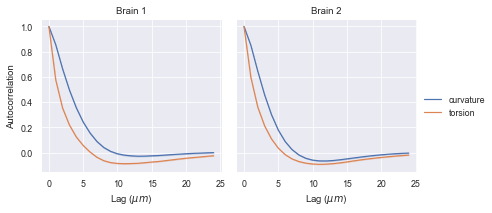

In [8]:
sns.set_theme()
sns.set_context("paper")

g = sns.FacetGrid(df, col="brain", hue="measure")
g.map(sns.lineplot, "distance", "value")
g.set_axis_labels(r"Lag ($\mu m$)", "Autocorrelation")
g.add_legend(title="")
axes = g.axes.flatten()
axes[0].set_title("Brain 1")
axes[1].set_title("Brain 2")
g.savefig(os.path.join(experiment_dir, "figures",  f"autocorrelation.eps"))
g.savefig(os.path.join(experiment_dir, "figures", f"autocorrelation.jpg"))